In [12]:
#Step 0: Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [13]:
#Step 1: Load data
url='https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv'
df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df_raw.sample(10, random_state=2025)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
82,7,83,78,26,71,29.3,0.767,36,0
152,9,156,86,28,155,34.3,1.189,42,1
393,4,116,72,12,87,22.1,0.463,37,0
691,13,158,114,0,0,42.3,0.257,44,1
14,5,166,72,19,175,25.8,0.587,51,1
542,10,90,85,32,0,34.9,0.825,56,1
749,6,162,62,0,0,24.3,0.178,50,1
629,4,94,65,22,0,24.7,0.148,21,0
724,1,111,94,0,0,32.8,0.265,45,0
222,7,119,0,0,0,25.2,0.209,37,0


In [14]:
#Step 2: Preprocessing
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()
outcome_str = {0:"negativo", 1:"positivo"}
df_baking['outcome'] = df_baking['outcome'].replace(outcome_str)
df_baking['outcome'] =  df_baking['outcome'].astype('category')
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   pregnancies               768 non-null    int64   
 1   glucose                   768 non-null    int64   
 2   bloodpressure             768 non-null    int64   
 3   skinthickness             768 non-null    int64   
 4   insulin                   768 non-null    int64   
 5   bmi                       768 non-null    float64 
 6   diabetespedigreefunction  768 non-null    float64 
 7   age                       768 non-null    int64   
 8   outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [6]:
df.sample(10, random_state=2025)

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
82,7,83,78,26,71,29.3,0.767,36,negativo
152,9,156,86,28,155,34.3,1.189,42,positivo
393,4,116,72,12,87,22.1,0.463,37,negativo
691,13,158,114,0,0,42.3,0.257,44,positivo
14,5,166,72,19,175,25.8,0.587,51,positivo
542,10,90,85,32,0,34.9,0.825,56,positivo
749,6,162,62,0,0,24.3,0.178,50,positivo
629,4,94,65,22,0,24.7,0.148,21,negativo
724,1,111,94,0,0,32.8,0.265,45,negativo
222,7,119,0,0,0,25.2,0.209,37,negativo


In [15]:
#Step 3: EDA
df_train, df_test = train_test_split(df, test_size=0.1, stratify=df['outcome'], random_state=2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.shape, df_test.shape

((691, 9), (77, 9))

In [16]:
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
pregnancies,691.0,3.846599,3.384050,0.000,1.0000,3.000,6.0000,17.00
glucose,691.0,120.700434,31.835651,0.000,99.0000,117.000,140.0000,199.00
bloodpressure,691.0,69.406657,18.577715,0.000,63.0000,72.000,80.0000,122.00
skinthickness,691.0,20.609262,16.075479,0.000,0.0000,23.000,32.0000,99.00
insulin,691.0,79.094067,115.859190,0.000,0.0000,18.000,126.0000,846.00
bmi,691.0,32.049493,7.745550,0.000,27.3000,32.000,36.6000,67.10
diabetespedigreefunction,691.0,0.467904,0.322700,0.078,0.2405,0.375,0.6215,2.42
age,691.0,33.166425,11.656923,21.000,24.0000,29.000,40.0000,81.00


,count,unique,top,freq
outcome,691,2,negativo,450


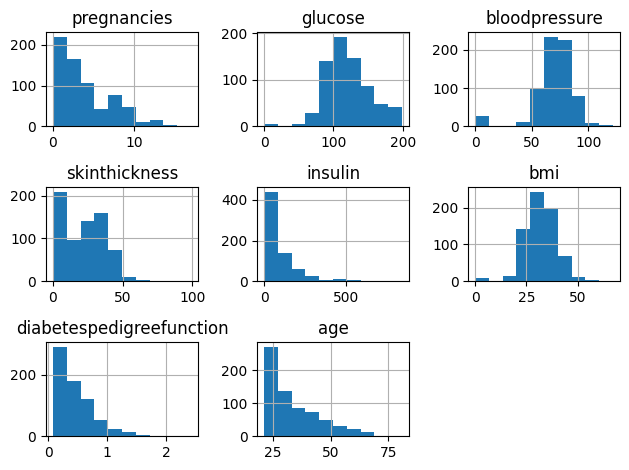

In [17]:
#Analisis univariado
df_train.hist()
plt.tight_layout()
plt.show()

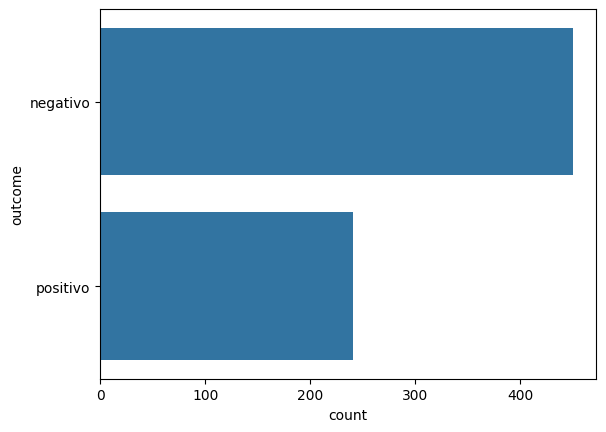

In [18]:
sns.countplot(df_train, y='outcome')
plt.show()

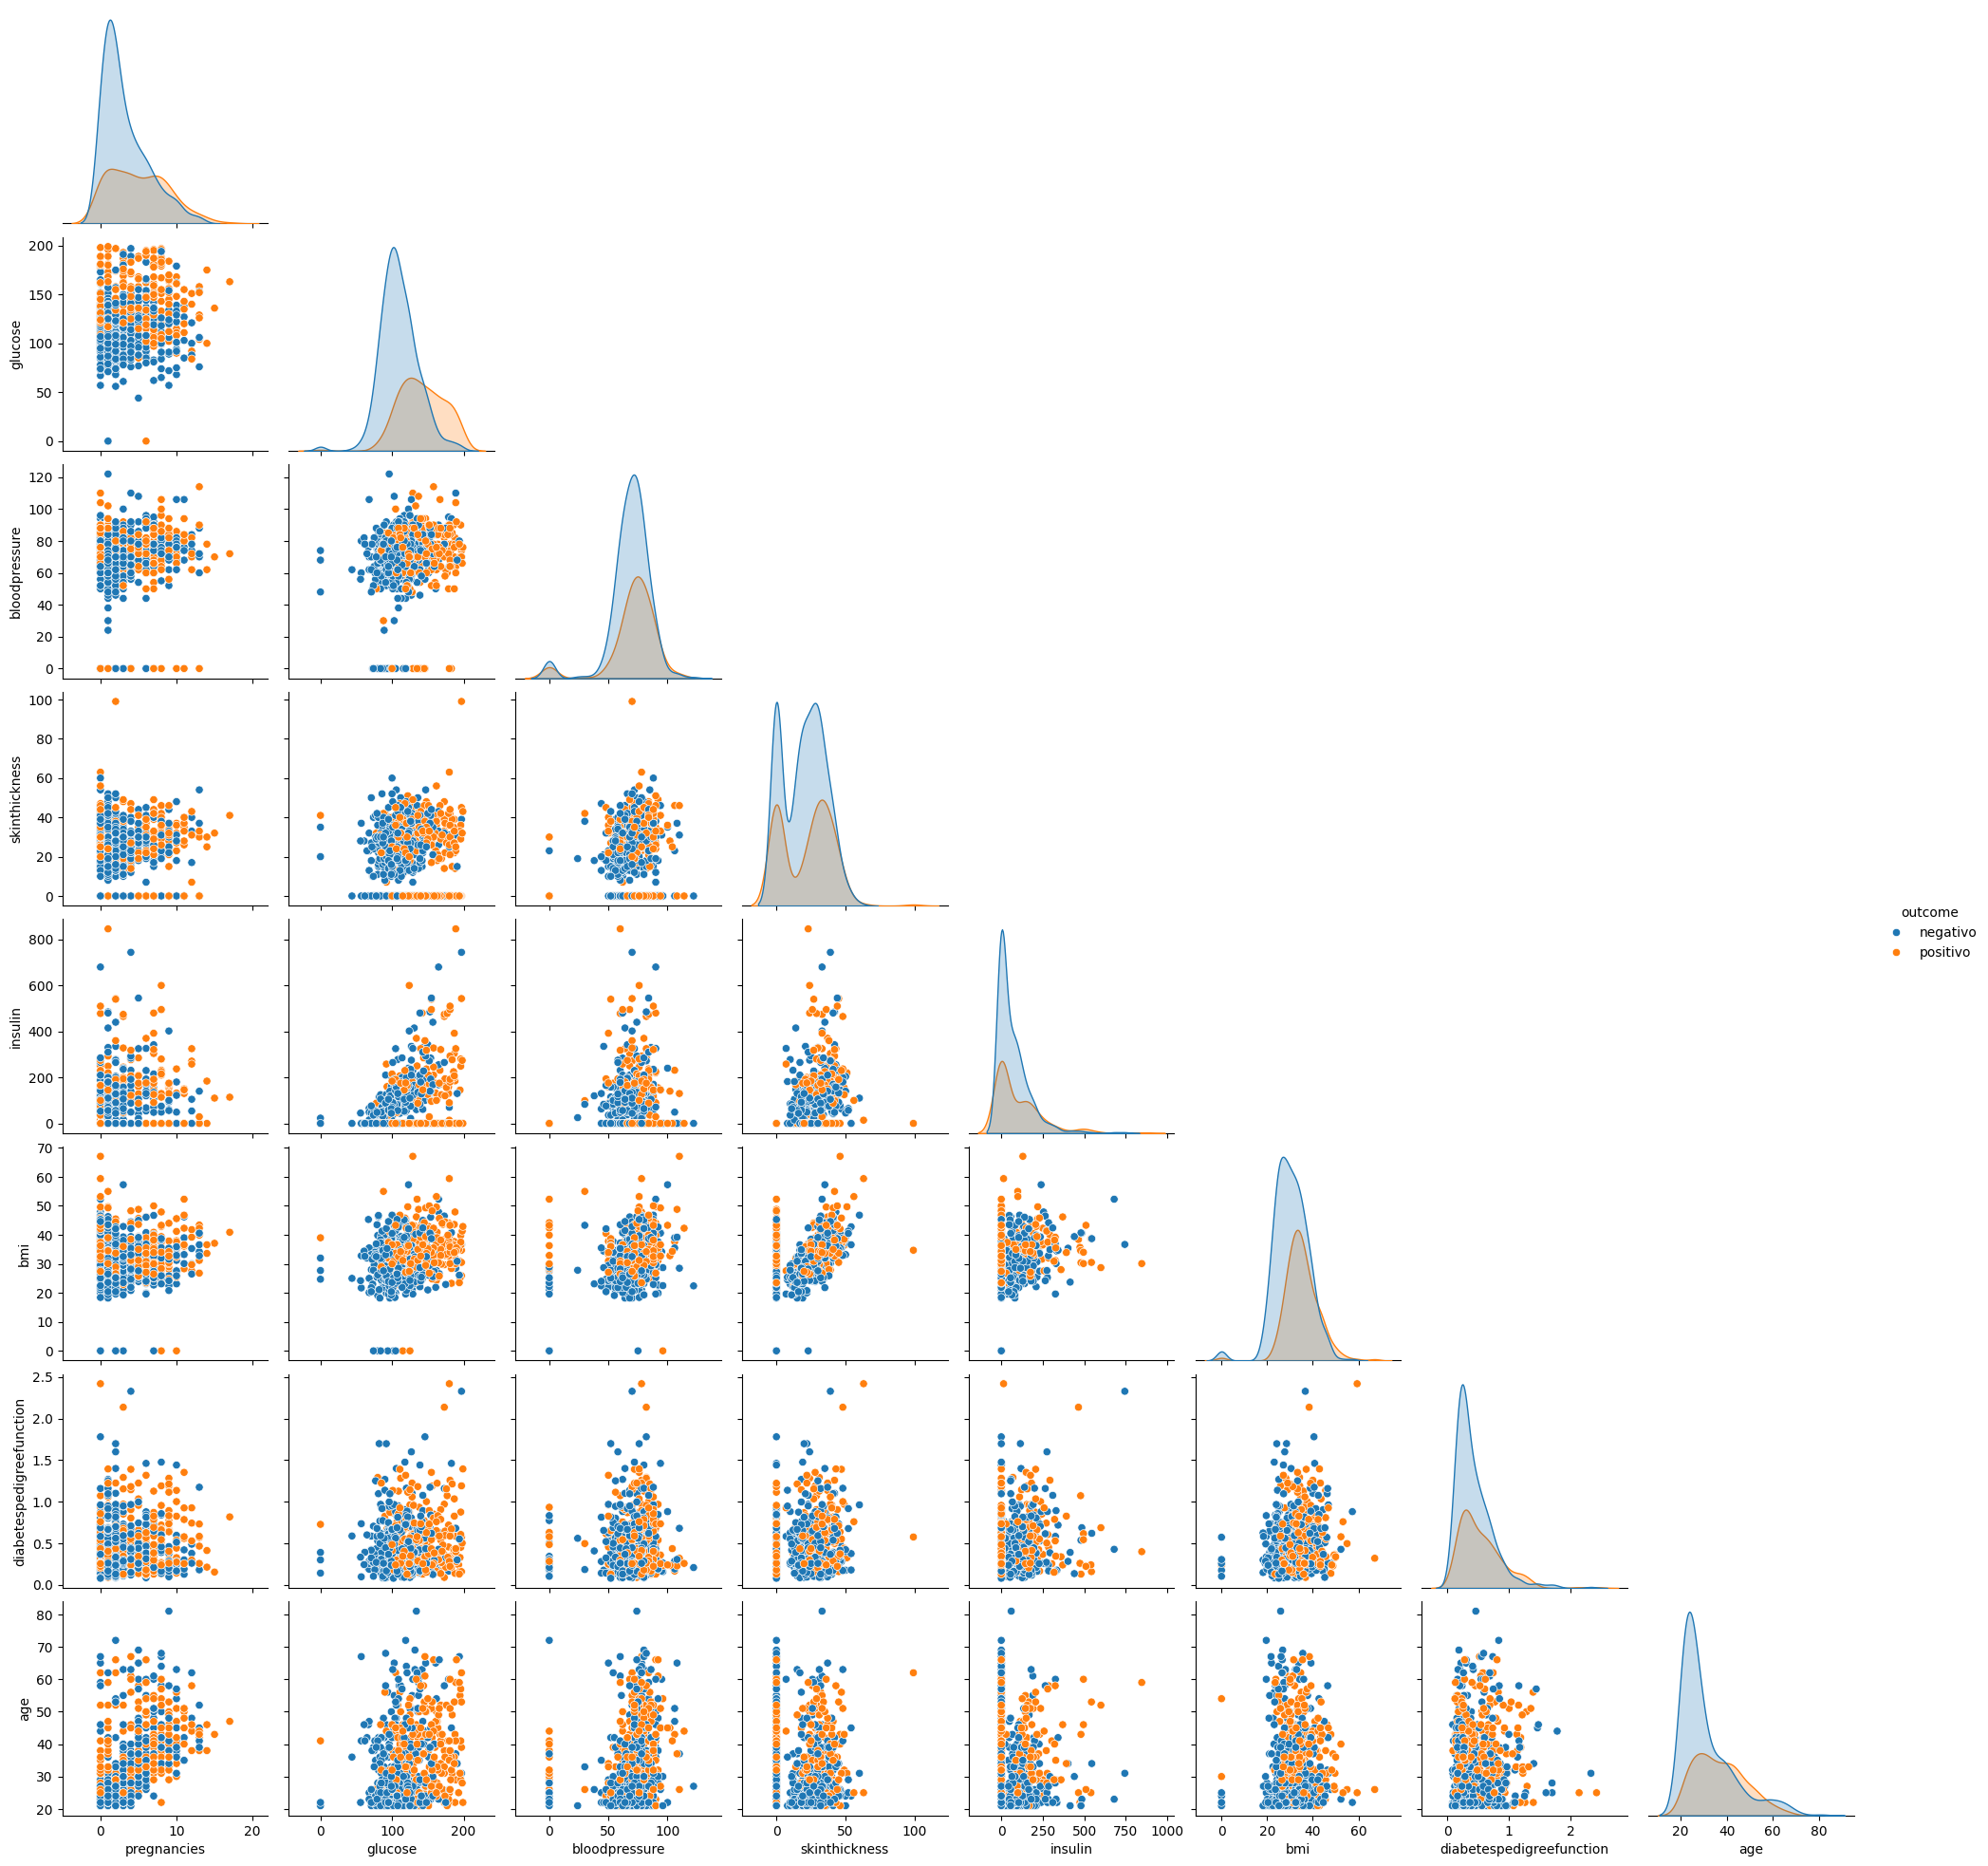

In [19]:
#Analisis bivariado
sns.pairplot(df_train, hue='outcome', corner=True)
plt.show()

<Axes: >

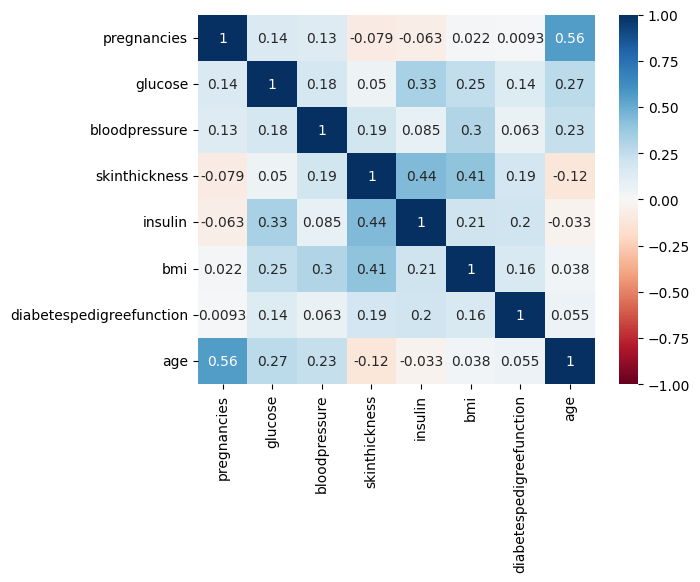

In [20]:
#Grafica de correlacion
sns.heatmap(df_train.select_dtypes('number').corr(), vmin=-1, vmax=1, cmap='RdBu', annot=True)

In [21]:
#Step 4: ML
X_train = df_train.drop(columns='outcome')
y_train = df_train['outcome']

X_test = df_test.drop(columns='outcome')
y_test = df_test['outcome']

X_test.shape, y_test.shape


((77, 8), (77,))

In [22]:
encoder =LabelEncoder()
y_train_enc = encoder.fit_transform(y_train) 
y_test_enc = encoder.transform(y_test) 

In [45]:
tree_clf = DecisionTreeClassifier(random_state=2025, max_depth=3)
tree_clf.fit(X_train, y_train_enc)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2025
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [46]:
y_hat = tree_clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test_enc, y_hat)}')

Accuracy: 0.7402597402597403


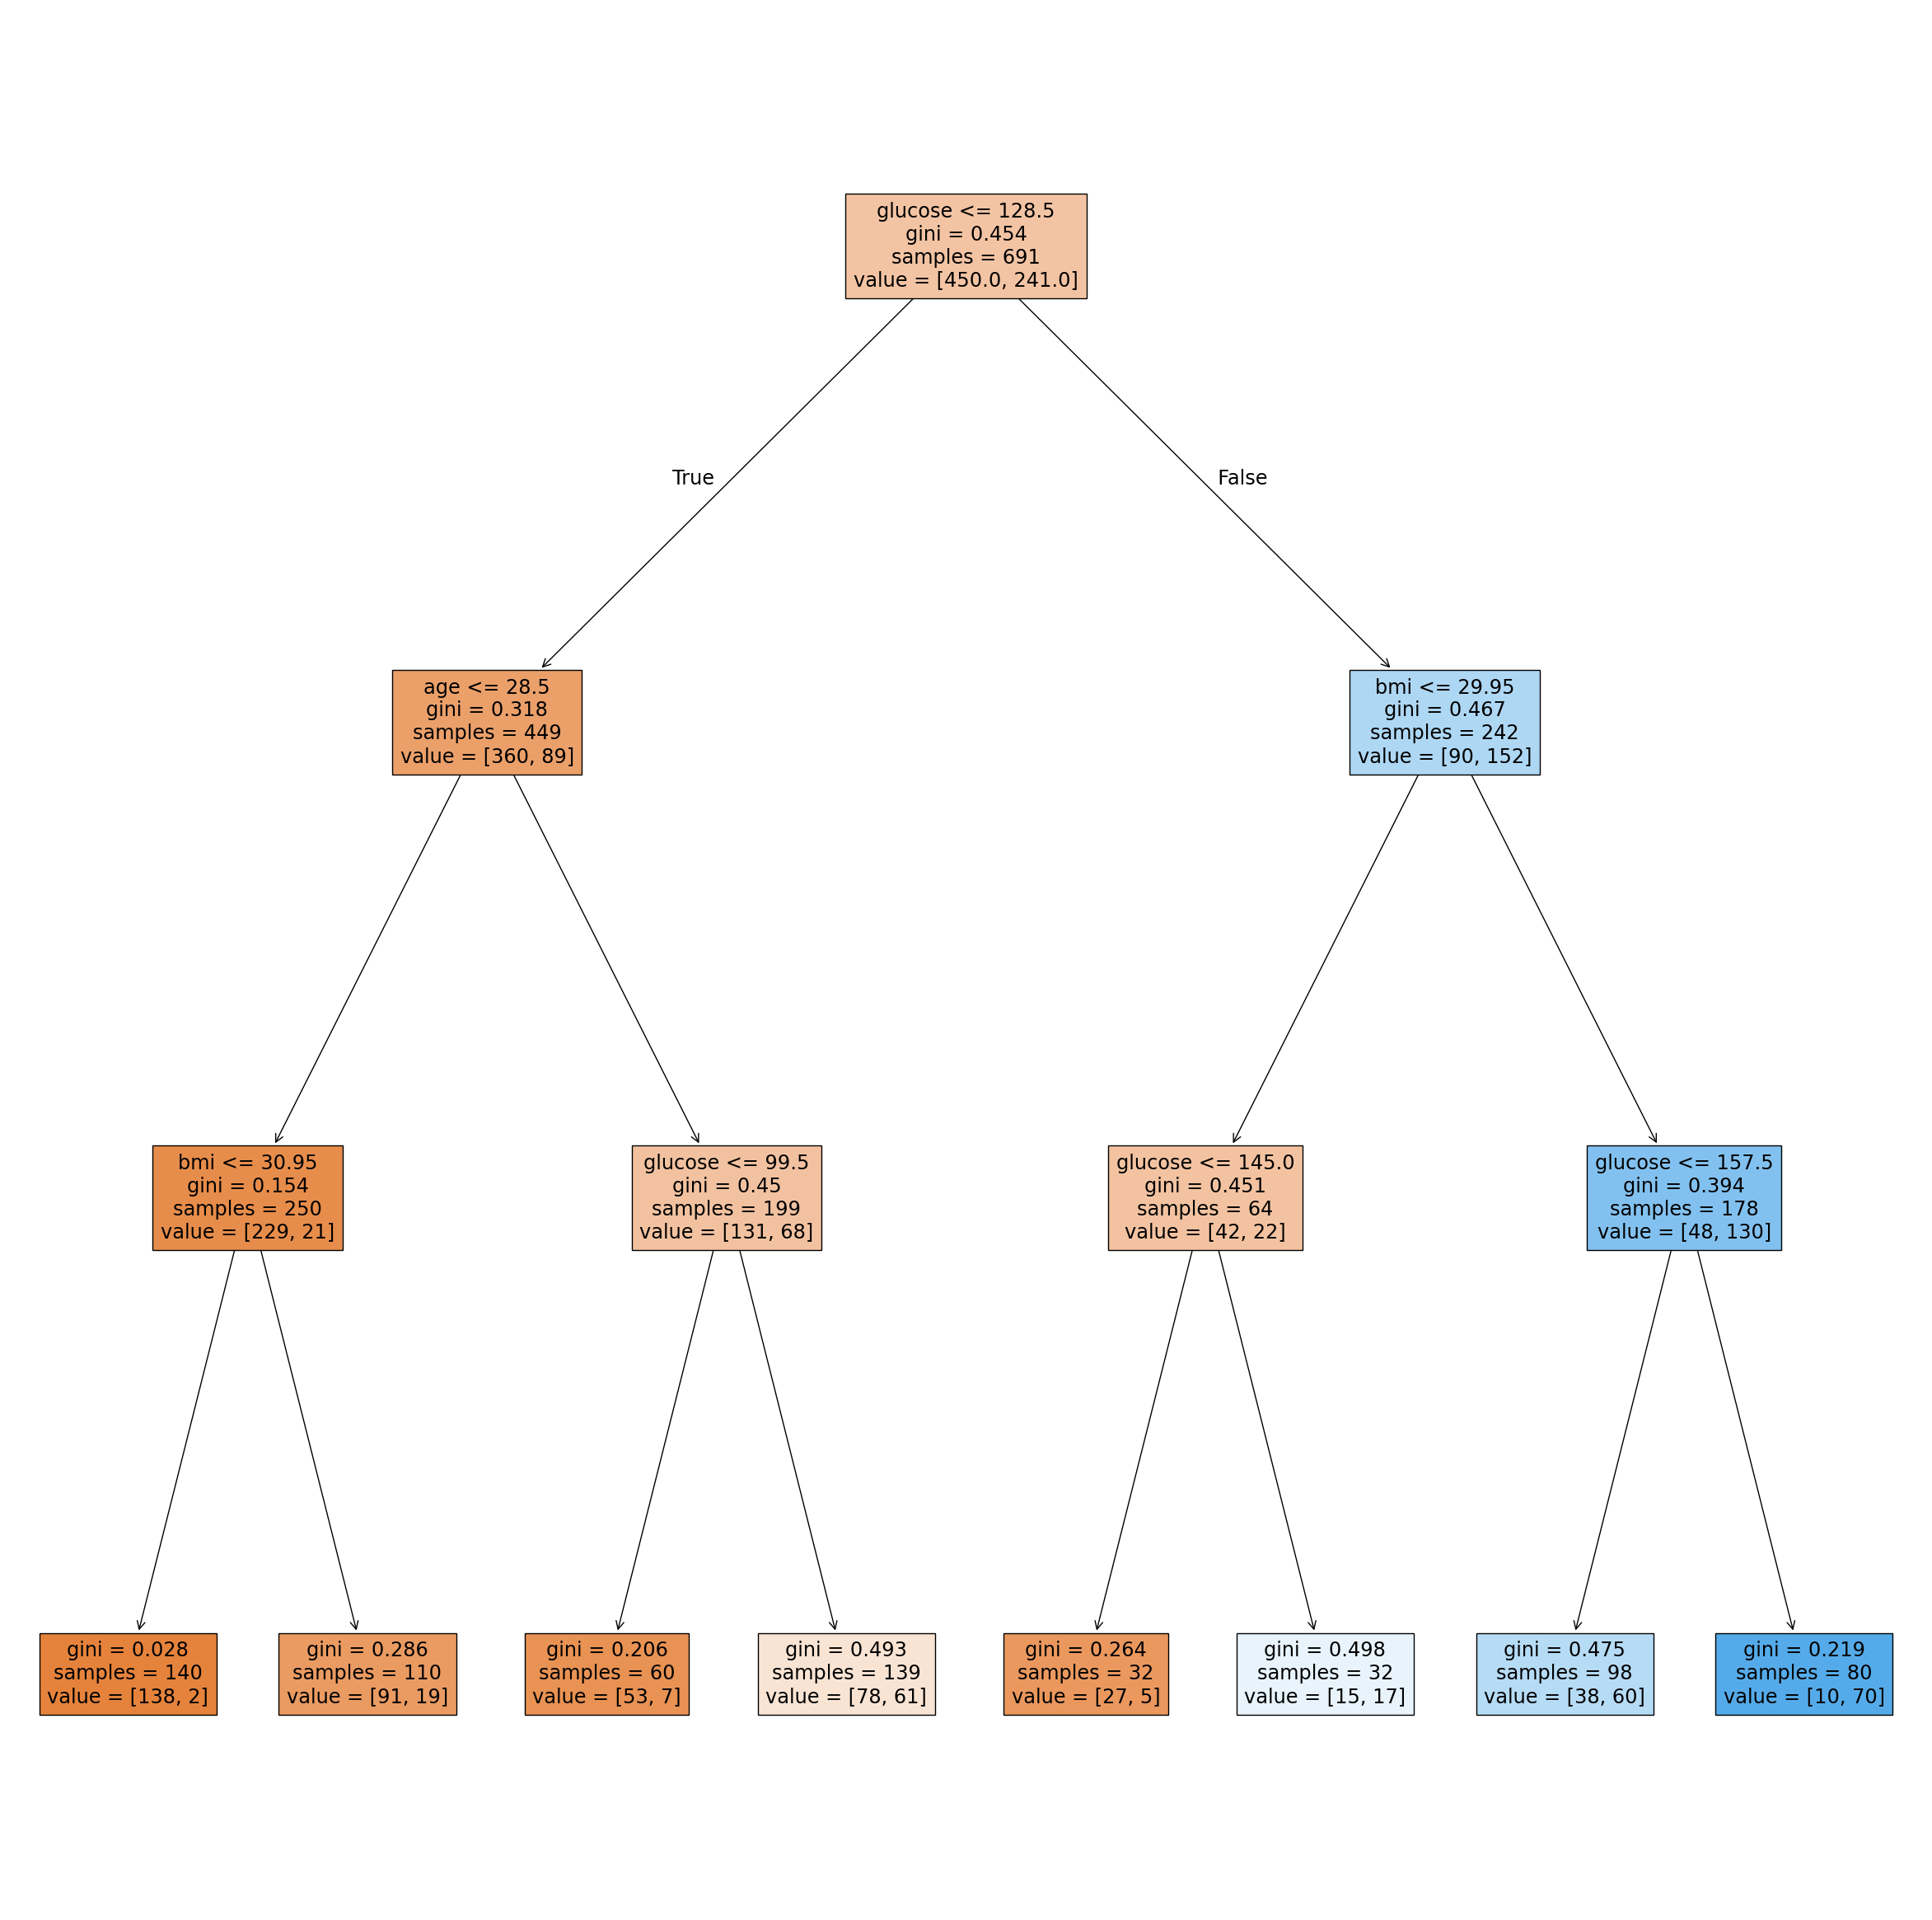

In [47]:
plt.figure(figsize=(30,30))
plot_tree(tree_clf, feature_names=X_train.columns, filled=True, impurity=True)
plt.show()

In [32]:
tree_clf_cv = GridSearchCV(
    tree_clf, 
    param_grid = {
        'max_depth': [1,2,3,4,5,6,7], #Va ir probando estas profundidades
        'min_samples_leaf': [1,2,4,6] #hojas
        },
    cv = 5,
    scoring = 'accuracy'
)

tree_clf_cv.fit(X_train, y_train_enc)
tree_clf_cv.best_params_

{'max_depth': 5, 'min_samples_leaf': 6}